# Preparrando dados

## Impoertando bibliotecas e dataset

In [2]:
!pip install pyjanitor

     |████████████████████████████████| 107 kB 1.4 MB/s 


In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import janitor as jn

# visualization
import matplotlib.pyplot as plt

# machine learning
from sklearn.experimental import enable_iterative_imputer
from sklearn import ensemble
from sklearn import impute
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import tree

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/jbryer/CompStats/master/Data/titanic3.csv")

In [5]:
orig_df = df

## Tamanho dos dados

In [6]:
#funação para serpara a base teste e treinamentos

def tweak_titanic(df):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

In [7]:
def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=size, random_state=42
    )
    cols = X.columns
    num_cols = [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
    ]
    fi = impute.IterativeImputer()
    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(orig_df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [8]:
X.shape

(1309, 8)

## Estatisticas Resumidas

In [9]:
# Pesquisando número de  valores diferentes de NaN
X.describe().iloc[: ,[0, -1]]

,pclass,embarked_S
count,1309.000000,1309.000000
mean,-0.012831,0.698243
std,0.995822,0.459196
min,-1.551881,0.000000
25%,-0.363317,0.000000
50%,0.825248,1.000000
75%,0.825248,1.000000
max,0.825248,1.000000


1. A linha de contador __count__ ind eica que todas as linhas estão preenchidas;
2. Um DataFrame pandas tem um atributo iloc que podemos usar para fazer operações com índices. 
   Ele nos permite selecionar linhas e colunas com base na posição do índice.

In [ ]:
# exempl: trazendo a segunda e a quinta linhas e as últimas três colunas
X.iloc[[1,4], -3:]

,sex_male,embarked_Q,embarked_S
677,1,0,1
864,0,0,1


In [ ]:
# com  ".loc" podemos extrair linhas e colinas com base no nome em vez da posição
X.loc[[677, 864], "sex_male":]

,sex_male,embarked_Q,embarked_S
677,1,0,1
864,0,0,1


## Histograma

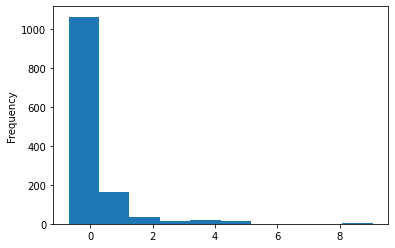

In [ ]:
# usando "plot"

fig, ax = plt.subplots(figsize=(6,4))
X.fare.plot(kind="hist", ax=ax)
fig.savefig("images/mlpr_0601.png", dpi=300)

## Gráfico de dispersão
__scatter plot__: mostra o relacionamento de duas variaveis númericas

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,4))
X.plot.scatter(x="age", y="fare", ax=ax, alpha=0.3)
fig.savefig("images/mlpr_0603.png", dpi=300)

Não parece haver muita correlação entre esses dois atibutos

### Verificando a correlação entre dois atibutos
.corr()

In [ ]:
X.age.corr(X.fare)

0.17720039845406144

## Gráfico conjunto
__Yellowbrick__ tem um gráfico de dispersão mais sofisticado que inclui
histograma nas boresas e uma linha de regressão

In [ ]:
from yellowbrick.features import JointPlotVisualizer

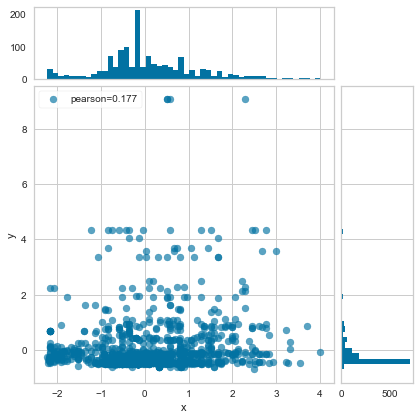

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
jpv = JointPlotVisualizer(feature="age", target="fare")
jpv.fit(X["age"], X["fare"])
jpv.poof()
fig.savefig("images/mlpr_0604.png", dpi=300)

c:\users\anselmonovais\documents\base\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


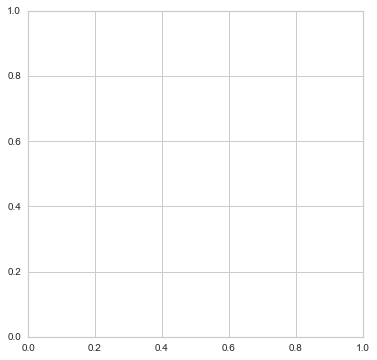

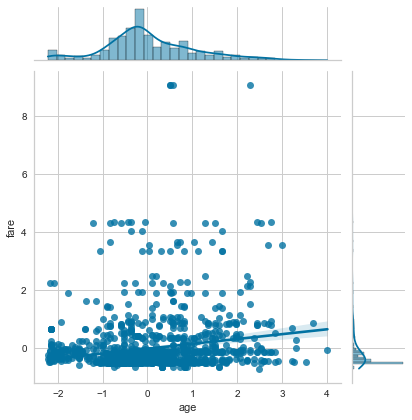

In [ ]:
# Gráfico conjunto com seaborn
from seaborn import jointplot
fig, ax = plt.subplots(figsize=(6,6))
new_df = X.copy()
new_df['target'] = y
p = jointplot("age", "fare", data=new_df, kind="reg")
p.savefig("images/mlpr_0605.png", dpi=300)

## Matrizes pares

In [ ]:
from seaborn import pairplot

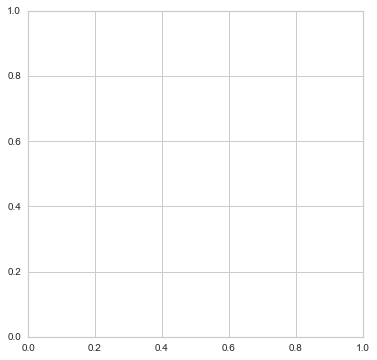

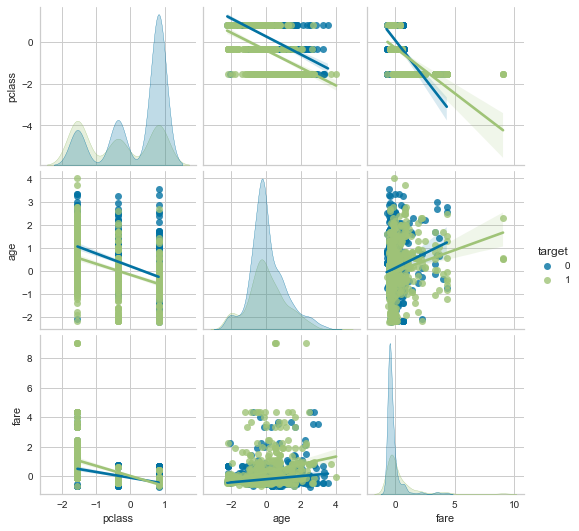

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
new_df = X.copy()
new_df['target'] = y
vars = ['pclass', 'age', 'fare']
plot = pairplot(new_df, vars=vars, hue="target", kind="reg")
plot.savefig("images/mlpr_0606.png", dpi=300)

## Gráfico de caixa (boxplot) ou gráfixco violino

In [ ]:
from seaborn import boxplot

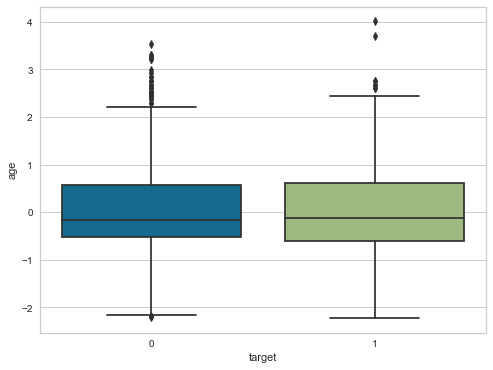

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
nw_df = X.copy()
new_df["target"] = y
boxplot(x="target", y="age", data=new_df)
fig.savefig("images/mlpr_0607.png", dpi=300)

In [ ]:
#grafico vilolino
from seaborn import violinplot

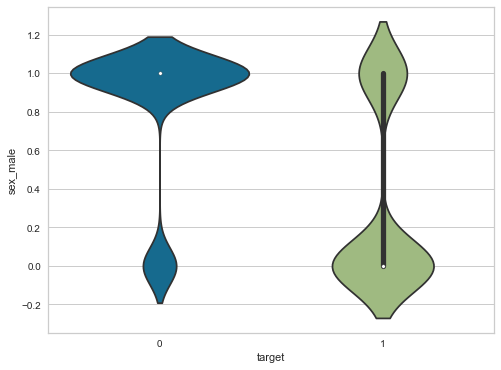

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
new_df = X.copy()
new_df["target"] = y
violinplot(x="target", y="sex_male", data=new_df)
fig.savefig("images/mlpr_0608.png", dpi=300)

## Comprando dois gráficos com valores ordinais

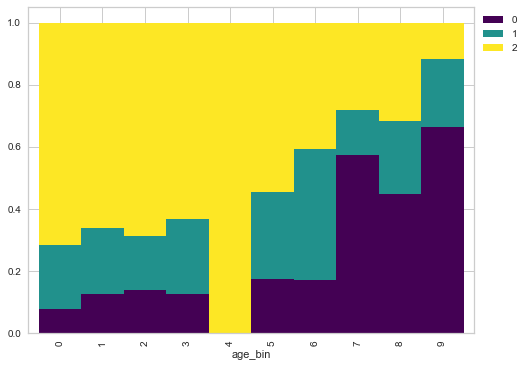

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
(
    X.assign(
        age_bin=pd.qcut(
            X.age, q=10, labels=False
        ),
        class_bin=pd.cut(
            X.pclass, bins=3, labels=False
        ),
    )
    .groupby(["age_bin", "class_bin"])
    .size()
    .unstack()
    .pipe(lambda df: df.div(df.sum(1), axis=0))
    .plot.bar(
        stacked=True,
        width=1,
        ax=ax,
        cmap="viridis",
    )
    .legend(bbox_to_anchor=(1, 1))
)
fig.savefig("images/mlpr_0609.png",
     dpi=300,
     bbox_inches="tight",
 )

## Correlação

In [ ]:
from yellowbrick.features import Rank2D

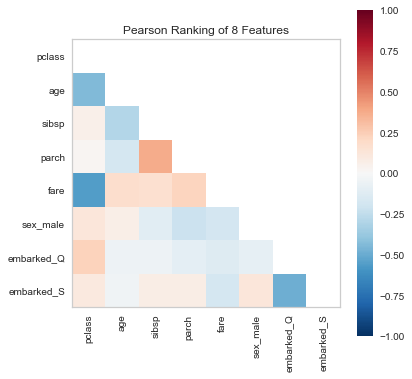

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
pcv = Rank2D(features=X.columns, algorithm='pearson')
pcv.fit(X,y)
pcv.transform(X)
pcv.poof()
fig.savefig("images/mplr_0610.png", dpi=300, bbox_inches="tight")

In [ ]:
# outro gráfico semelhante com seaborn
from seaborn import heatmap

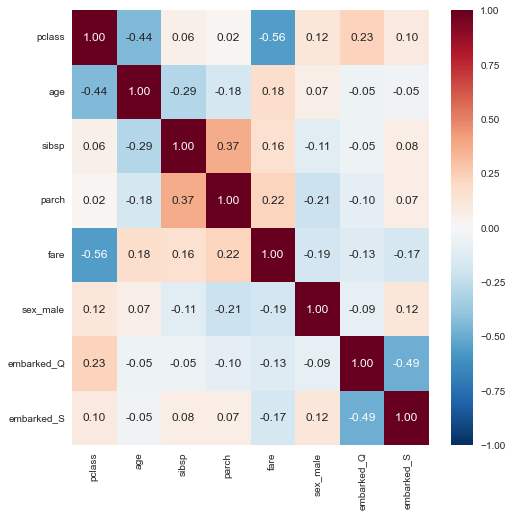

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = heatmap(X.corr(), fmt=".2f", annot=True,ax=ax, cmap="RdBu_r",
             vmin=-1, vmax=1)
fig.savefig("images/mlpr_0611.png", dpi=300, bbox_inches="tight")

In [ ]:
#correlação entre as duas primeiras colunas
X.corr().iloc[:, :2]

,pclass,age
pclass,1.000000,-0.439705
age,-0.439705,1.000000
sibsp,0.060832,-0.292055
parch,0.018322,-0.176447
fare,-0.558827,0.177200
sex_male,0.124617,0.065004
embarked_Q,0.230491,-0.053904
embarked_S,0.096335,-0.045361


In [ ]:
#função para identificar as colunas correlacionadas
def correlated_columns(df, threshold=0.95):
    return(
    df.corr()
        .pipe(
            lambda df1: pd.DataFrame(
                np.tril(df1, k=-1),
                columns=df.columns,
                index=df.columns
            )
        )
        .stack()
        .rename("Pearson")
        .pipe(
            lambda s: s[
                s.abs() > threshold
            ].reset_index()
        )
        .query("level_0 not in level_1")
    )


In [ ]:
correlated_columns(X)

,level_0,level_1,Pearson


In [ ]:
>>> agg = (
...     df.groupby("cabin")
...     .agg("min,max,mean,sum".split(","))
...     .reset_index()
... )
>>> agg.columns = [
...     "_".join(c).strip("_")
...     for c in agg.columns.values
... ]
>>> agg_df = df.merge(agg, on="cabin")

In [ ]:
c_df = correlated_columns(agg_df.select_dtypes('number'))
c_df.style.format({"pearson": "{:.2f}"})

,level_0,level_1,Pearson
3,pclass_mean,pclass,1.000000
4,pclass_mean,pclass_min,1.000000
5,pclass_mean,pclass_max,1.000000
6,sibsp_mean,sibsp_max,0.972490
7,parch_mean,parch_min,0.953439
8,parch_mean,parch_max,0.960448
9,fare_mean,fare,0.951700
10,fare_mean,fare_max,0.981042
17,body_sum,body,1.000000
18,body_sum,body_min,1.000000


## RadViz
Exibe todas as amostras em um círculo (Yellowbrick)

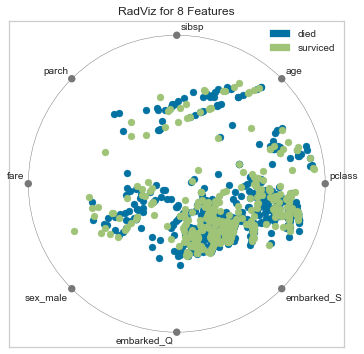

In [ ]:
from yellowbrick import features
fig, ax = plt.subplots(figsize=(6,6))
rv = features.RadViz(classes=["died", "surviced"], features=X.columns)
rv.fit(X,y)
_=rv.transform(X)
rv.poof()
fig.savefig("images/mlpr_0612.png", dpi=300)

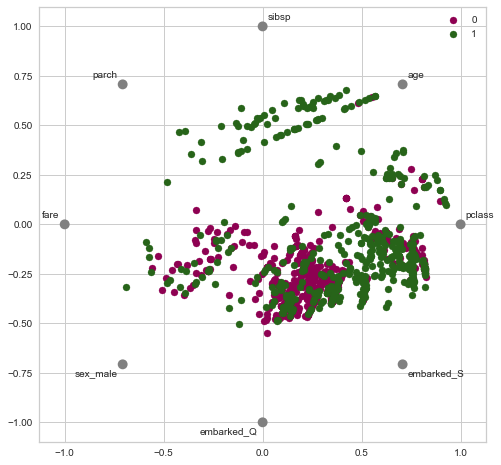

In [ ]:
#RadViz com pandas
fig, ax = plt.subplots(figsize=(8, 8))
new_df = X.copy()
new_df["target"] = y
pd.plotting.radviz(new_df, "target", ax=ax, colormap="PiYG")
fig.savefig("images/mlpr_-613.png", dpi=300)